#  Вебинар 5. Пайплайн исследования данных. Интерпретация моделей для бизнеса
Домашнее задание:  

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:  
1) провести исследовательский анализ данных,
2) визуализировать результаты и сделать из них выводы,
3) провести предобработку признаков (возможно создать новые),
4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,
6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).  

Данные:  

В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

Описание данных:  
- Customer - идентификатор пользователя
- State - штат
- Customer Lifetime Value - LTV пользователя
- Response - взаимодействие с рекламой
- Coverage - тип страхового покрытия
- Education - образование
- Effective to date - срок действия страховки
- EmploymentStatus - трудоустройство
- Gender - пол
- Income - доход
- Location code - тип местности в которой проживает пользователь
- Marital Status - семейное положение
- Monthly Premium Auto - Ежемесячный Премиум Авто
- Months Since Last Claim - месяцев с последнего требования по выплате компенсации
- Months Since Policy Inception - месяцев с открытия страховки
- Number of Open Complaints - количество незакрытых жалоб
- Number of Policies - количество полисов
- Policy Type - тип страховки
- Policy - страховка
- Renew Offer Type - обновленный тип предложения
- Sales Channel - канал продаж
- Total Claim Amount - сумма выплаченных компенсаций
- Vehicle Class - класс автомобиля
- Vehicle Size - размер автомобиля

In [197]:
# Устанавливаем пакеты если они не установлены
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Запрещаем вывод на экран предупреждений
warnings.filterwarnings('ignore')
# Настройка формата вывода чисел float
pd.set_option('display.float_format', '{:_.2f}'.format)

## Загрузка данных

### Загружаем дадасет

In [199]:
# Загрузим датасет пропуская сбойные строки
train_data = pd.read_csv('./LTV.csv', engine='python', on_bad_lines='skip')

### Посмотрим количество строк, столбцов

In [200]:
train_data.shape

(9134, 24)

### Посмотрим, что за данные

In [201]:
# Укажем в настройках, чтобы отображались все столбцы
pd.set_option('display.max_columns', None)
train_data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2_763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6_979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1_131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12_887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7_645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2_813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


In [202]:
# Вернем настройки в первоначальное состояние
pd.reset_option('display.max_columns')

### Информация о датафрейме

In [203]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Проверка пустых значений

In [204]:
# Настроим pd, чтобы выводились все строки 
pd.set_option('display.max_rows', None)
# Проверка того, в каких столбцах отсутствуют значения
print(train_data.isnull().sum(axis=0))
# Сбросим настройки вывода строк
pd.reset_option('display.max_rows')

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


### Проверка дубликатов

In [205]:
# Посмотрим сколько у нас дубликатов
duplicates = train_data.duplicated()
duplicates_train_data = train_data[duplicates]
duplicates_train_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


### Краткий отчет по датафрейму

In [206]:
train_data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00
mean,8_004.94,37_657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6_870.97,30_379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1_898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3_994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5_780.18,33_889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8_962.17,62_320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83_325.38,99_981.00,298.00,35.00,99.00,5.00,9.00,2_893.24


## Посмотрим на распределение данных

### Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [207]:
# Тренировочная выборка
X = train_data.drop('Customer Lifetime Value', axis = 1)
# Целевая переменная
y = train_data['Customer Lifetime Value']

### Выделим численные признаки от остальных

In [208]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [209]:
# Словарь название столбца и тип данных
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

## Построим графики, посмотрим на распределение признаков

In [210]:
# Словарь признаков и их русский перевод
translate_col = {
'Customer': 'идентификатор пользователя',
'State': 'штат',
'Customer Lifetime Value': 'LTV пользователя',
'Response': 'взаимодействие с рекламой',
'Coverage': 'тип страхового покрытия',
'Education': 'образование',
'Effective To Date': 'срок действия страховки',
'EmploymentStatus': 'трудоустройство',
'Gender': 'пол',
'Income': 'доход',
'Location Code': 'тип местности в которой проживает пользователь',
'Marital Status': 'семейное положение',
'Monthly Premium Auto': 'Ежемесячный Премиум Авто',
'Months Since Last Claim': 'месяцев с последнего \n требования по выплате компенсации',
'Months Since Policy Inception': 'месяцев с открытия страховки',
'Number of Open Complaints': 'количество незакрытых жалоб',
'Number of Policies': 'количество полисов',
'Policy Type': 'тип страховки',
'Policy': 'страховка',
'Renew Offer Type': 'обновленный тип предложения',
'Sales Channel': 'канал продаж',
'Total Claim Amount': 'сумма выплаченных компенсаций',
'Vehicle Class': 'класс автомобиля',
'Vehicle Size': 'размер автомобиля'
}

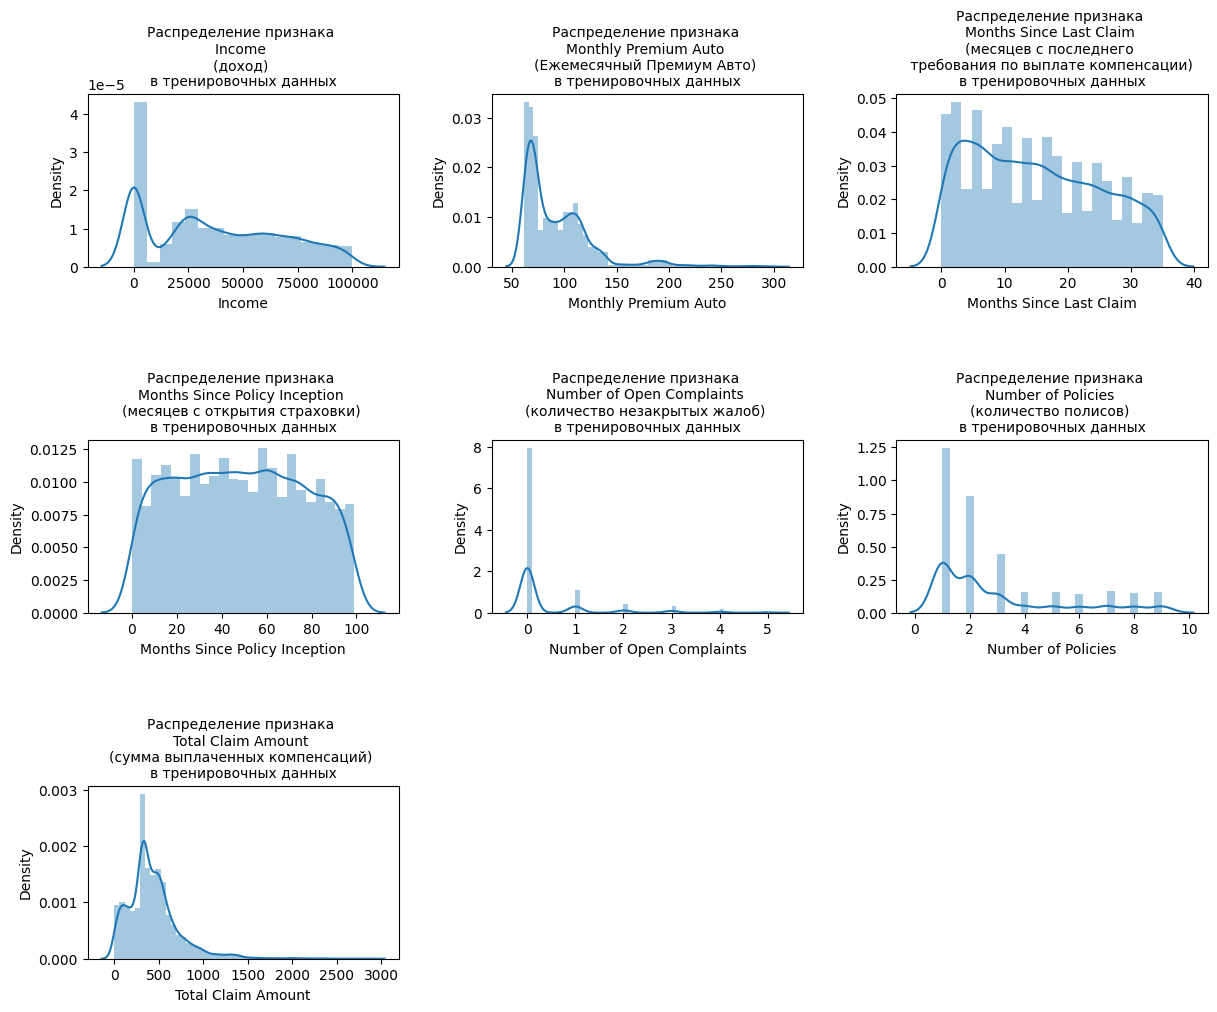

In [219]:
plt.figure(figsize=[14, 5])
# отрисовка графиков https://teletype.in/@pythontalk/matplotlib_subplot_tutorial



plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=2.0, 
                    bottom= 0.27, 
                    wspace= 0.3, 
                    hspace=1)

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    plt.title(f'Распределение признака \n{col} \n({translate_col[col]}) \nв тренировочных данных', fontsize=10)
    sns.distplot(train_data[col])
# plt.tight_layout()

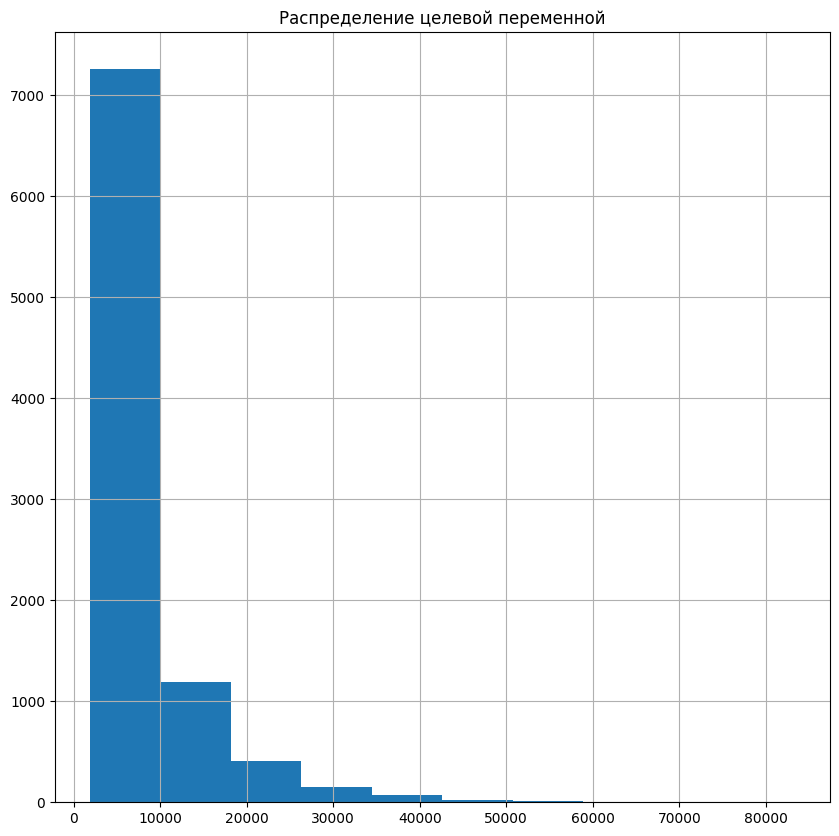

In [212]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

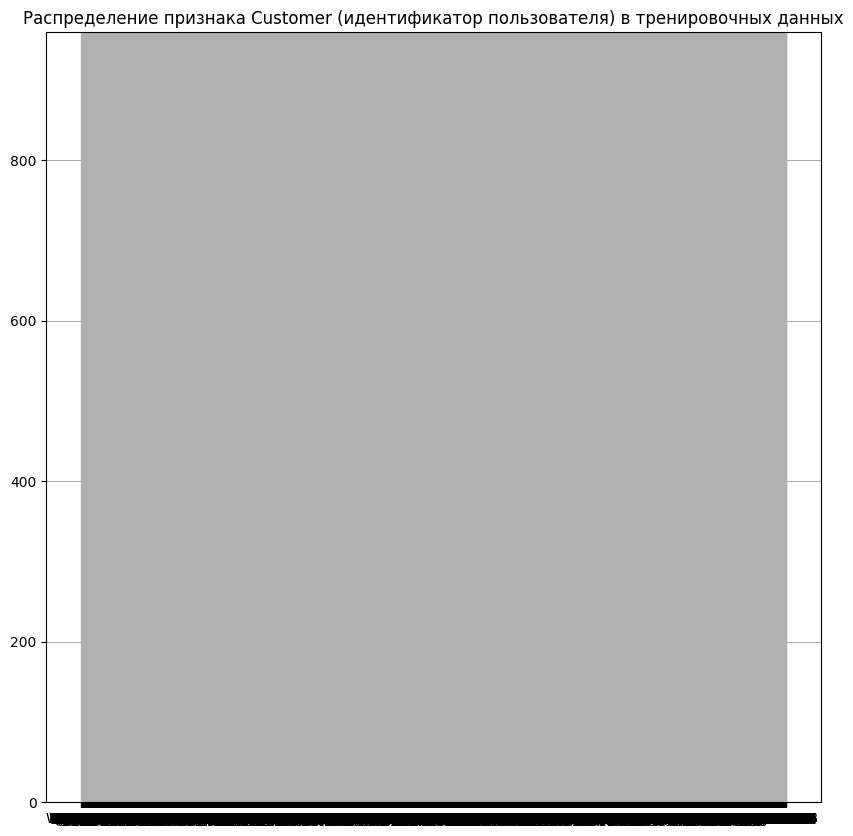

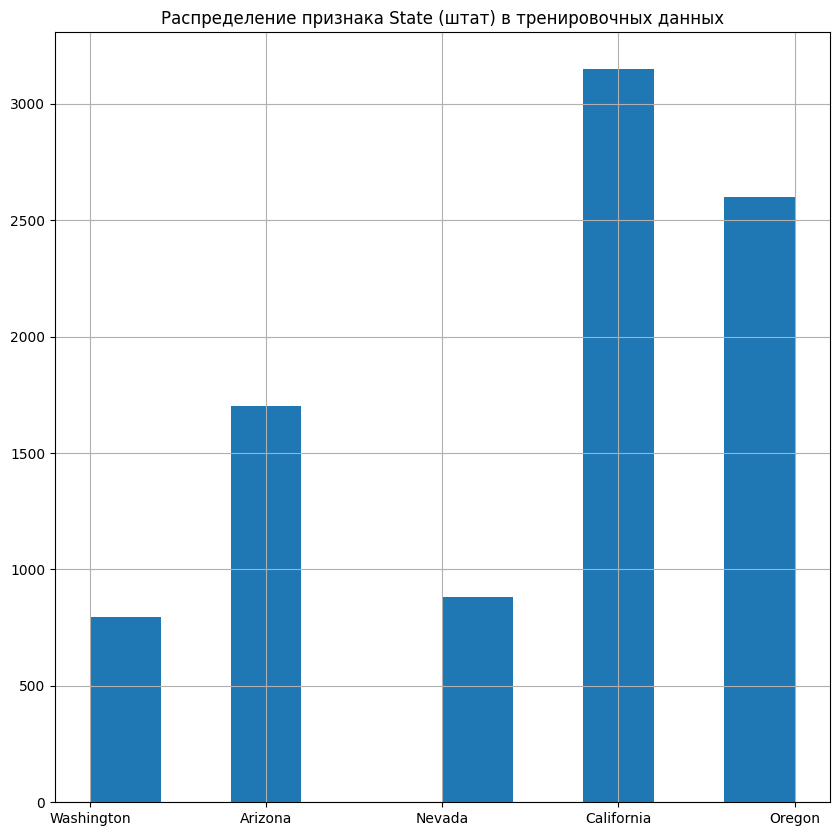

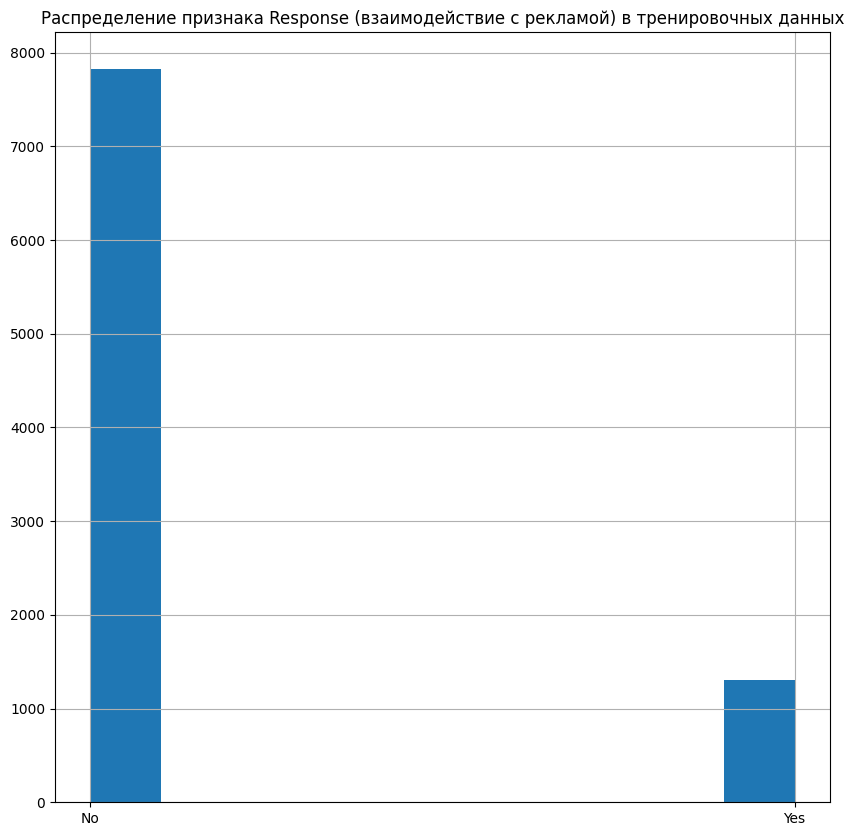

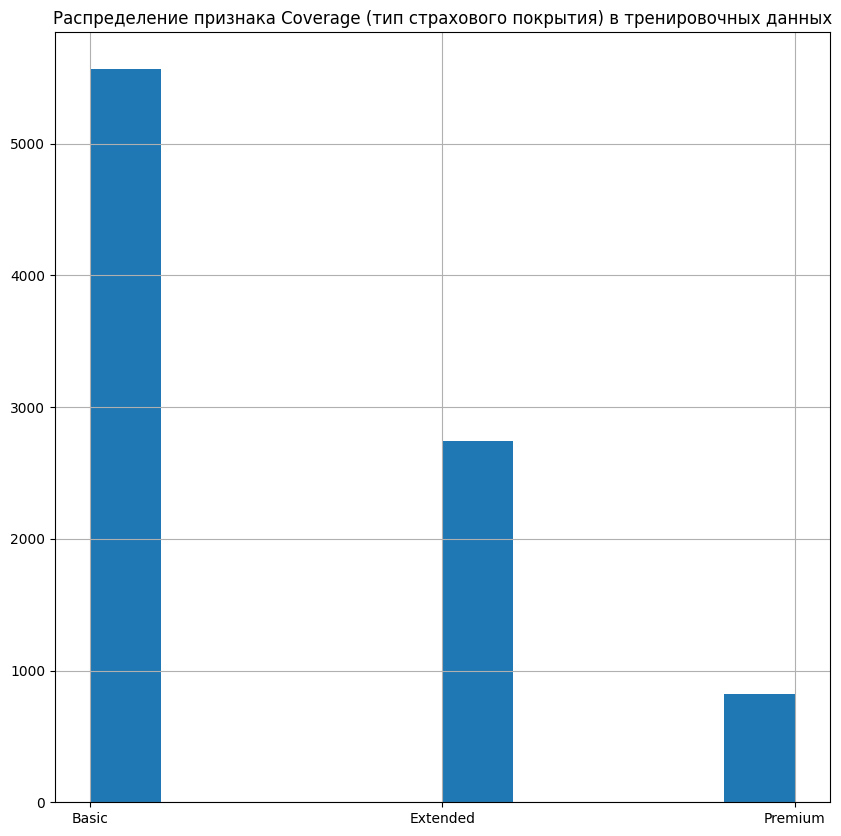

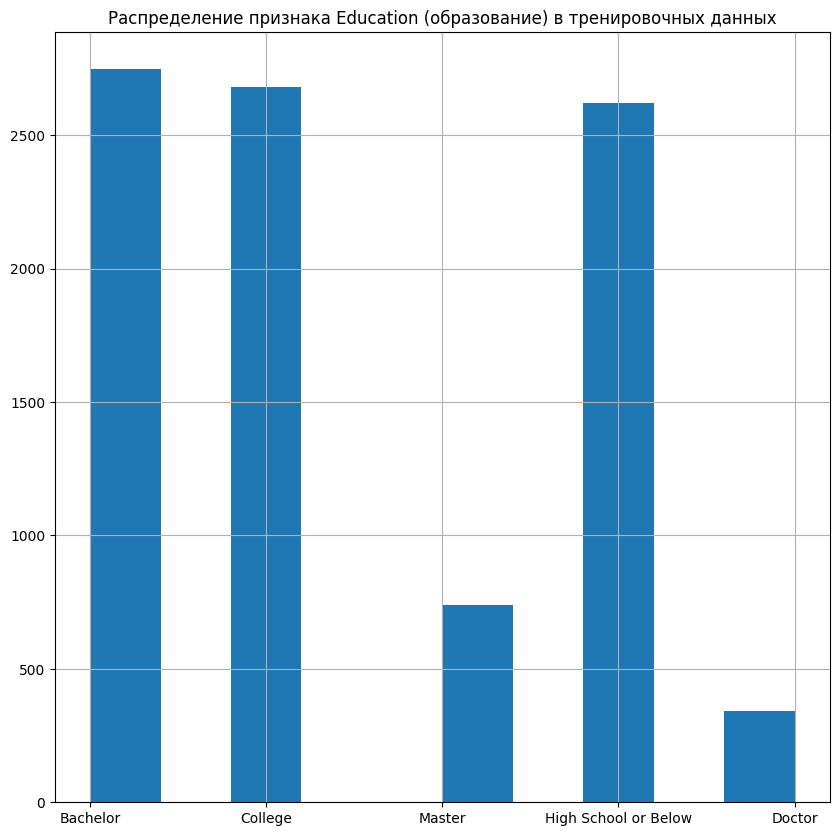

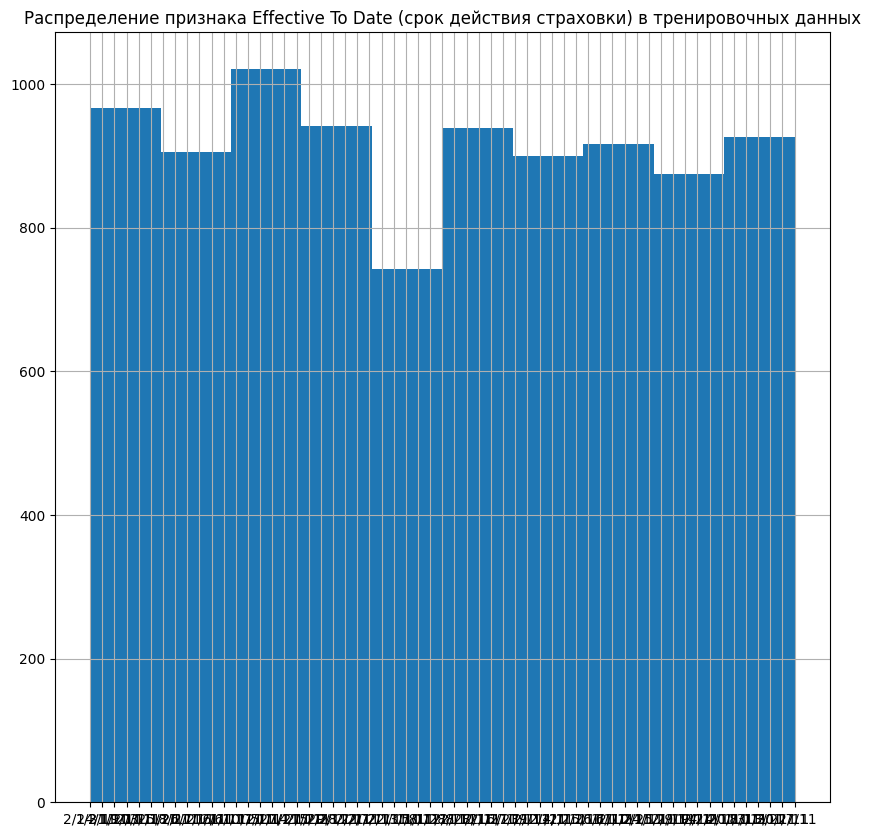

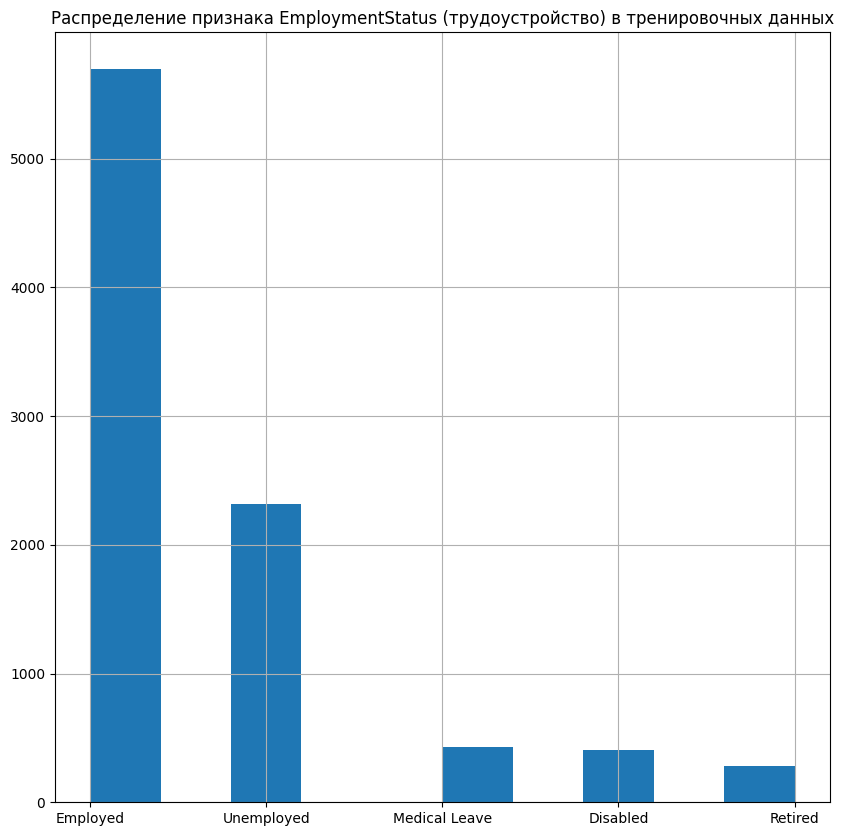

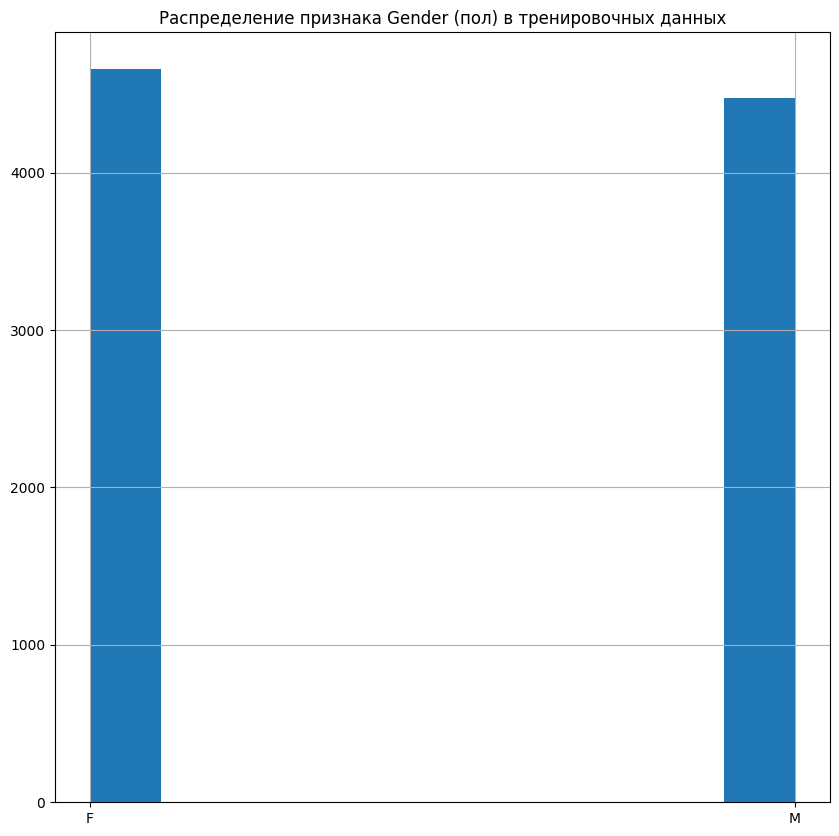

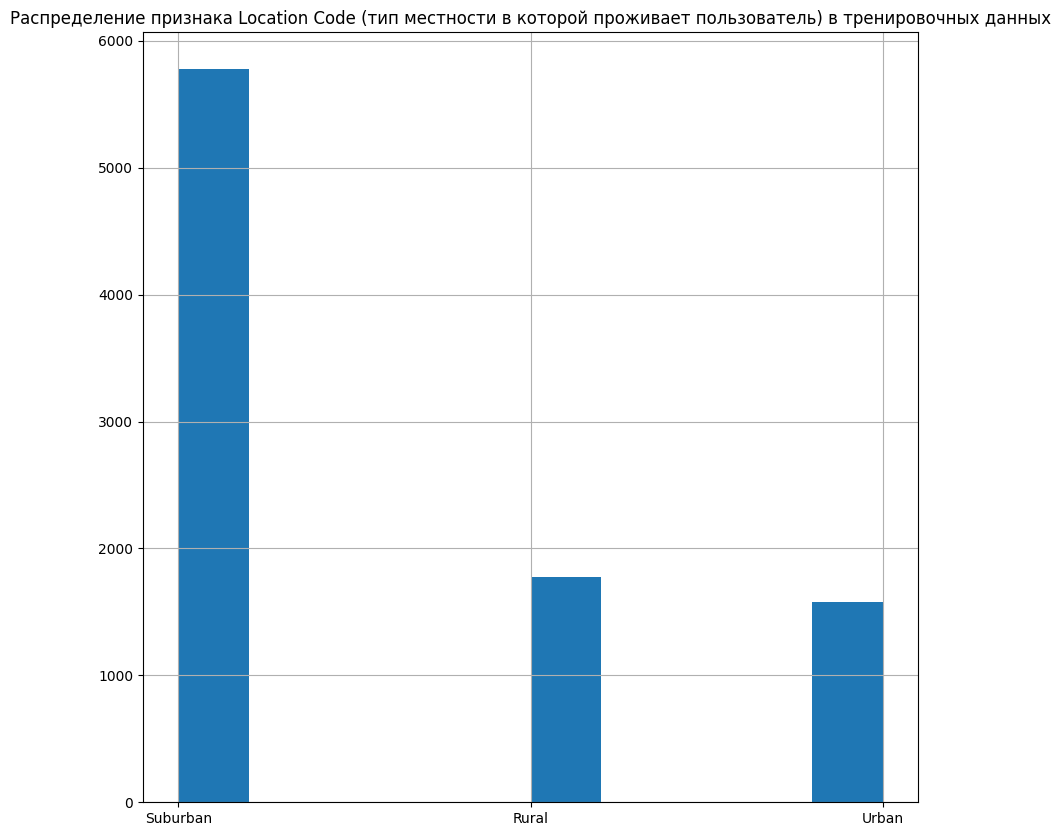

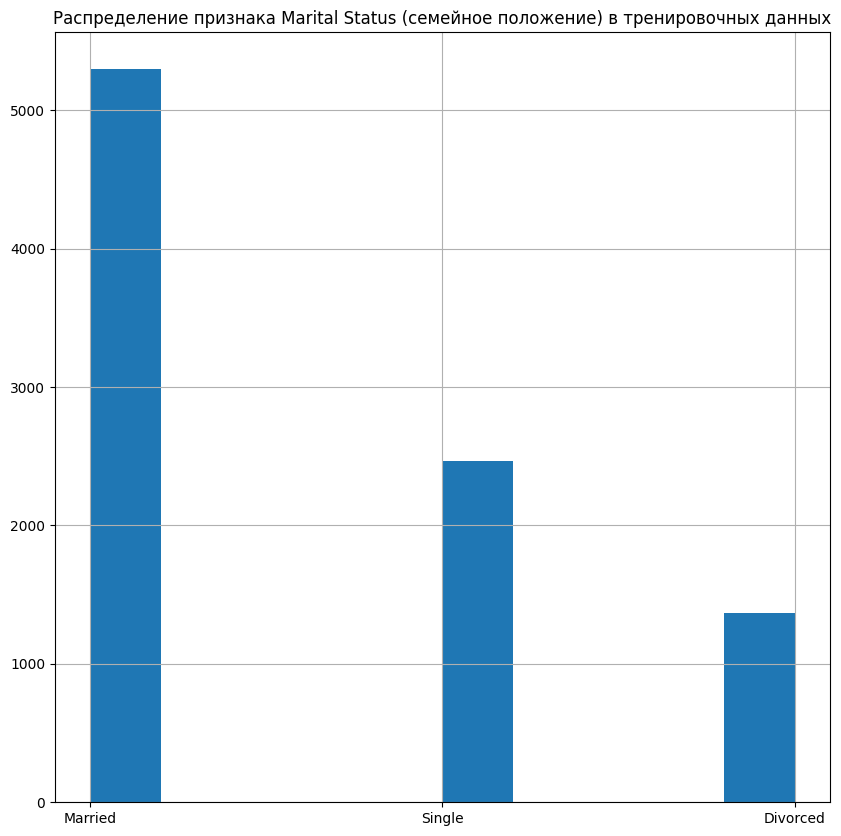

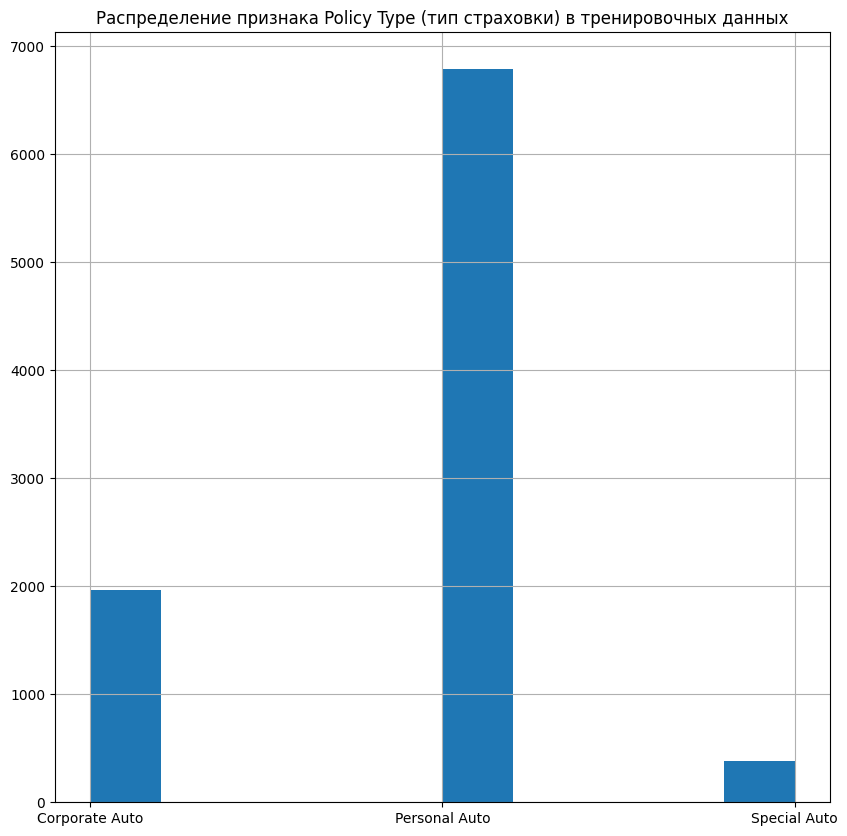

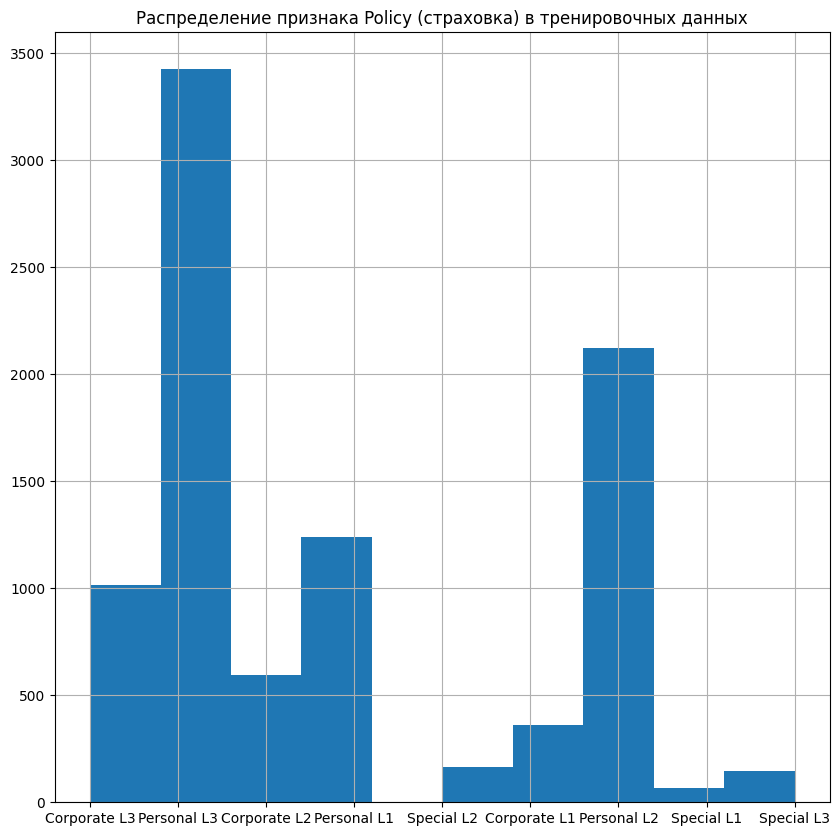

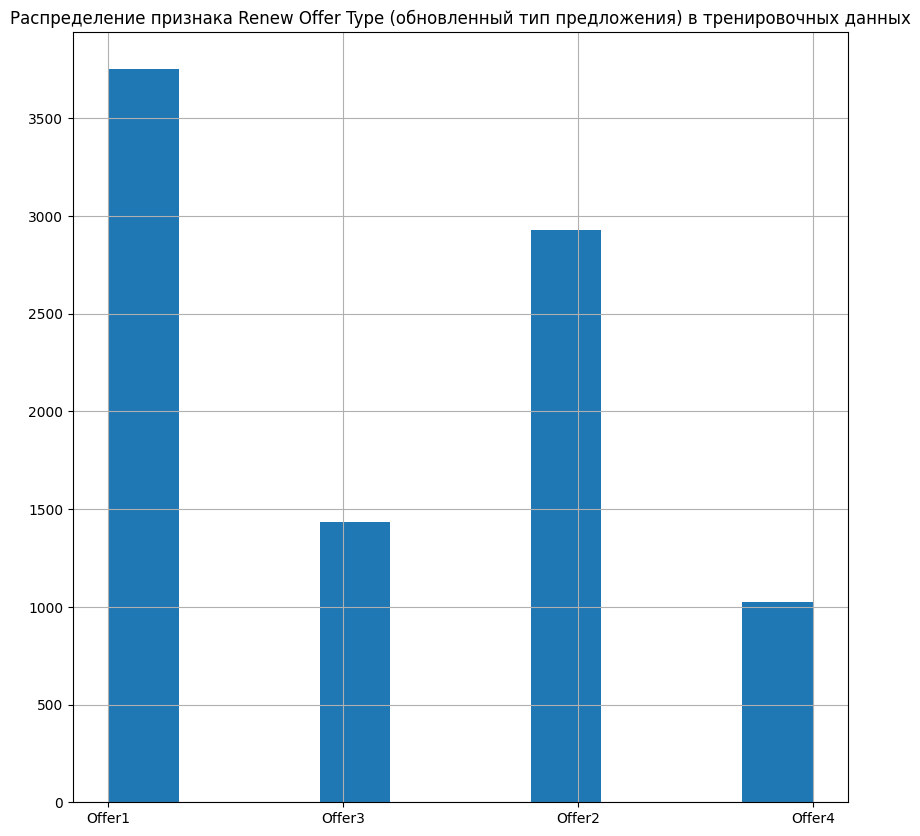

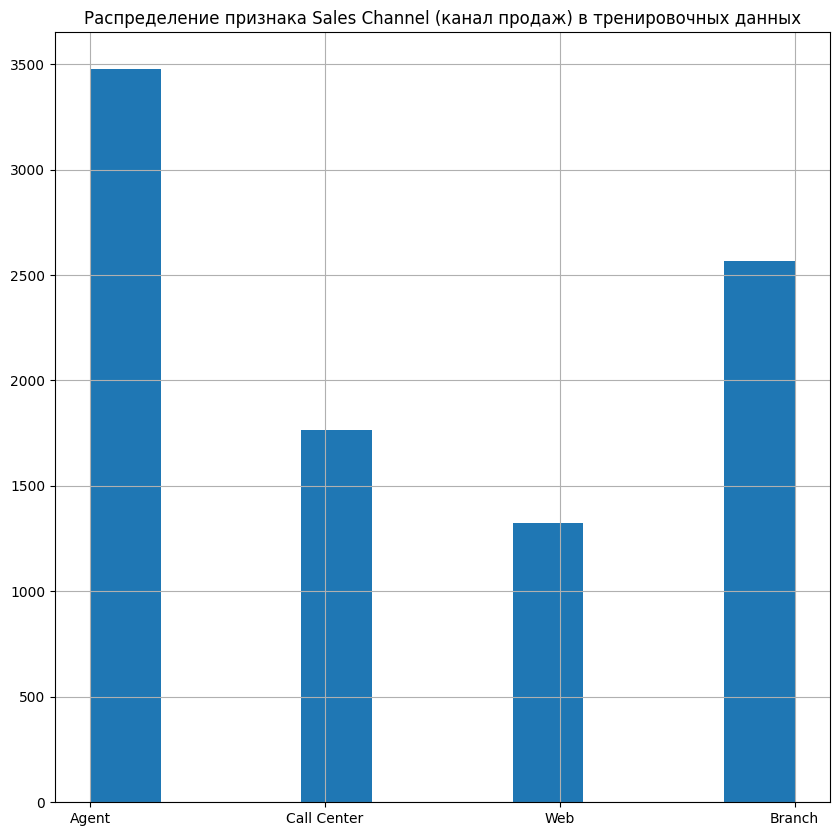

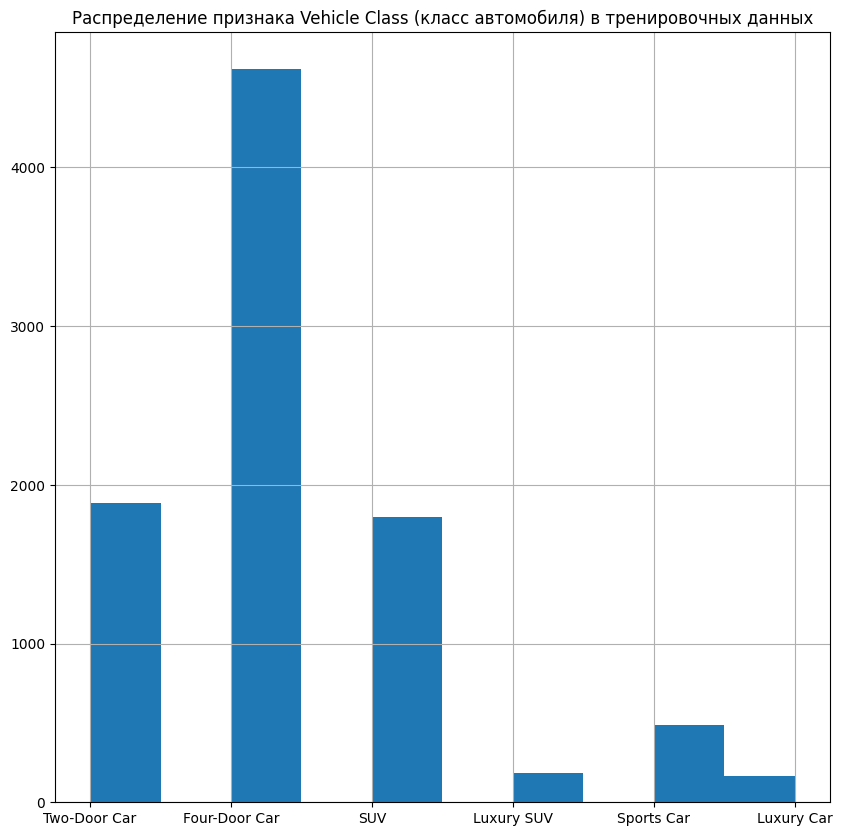

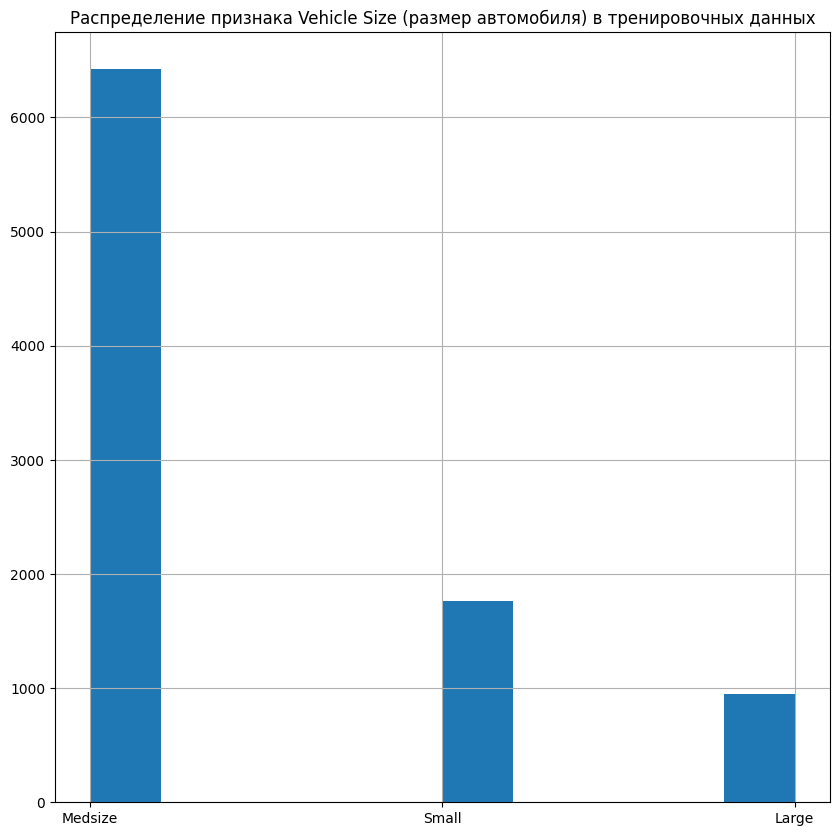

In [213]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} ({translate_col[col]}) в тренировочных данных')
    train_data[col].hist()